# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-03-25 17:26:21--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.07s   

2024-03-25 17:26:22 (848 KB/s) - ‘car_data.csv’ saved [58374/58374]



In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [1258]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,413,88,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
1,120,89,37,54,119,53,5,134,50,18,127,151,266,146,79,16,14,184,185
2,57,89,47,84,133,55,11,157,44,20,160,169,354,176,74,5,9,182,192
3,414,85,45,82,133,56,11,159,43,20,156,170,362,173,76,10,21,183,193
4,746,91,42,66,142,58,9,134,50,18,142,163,268,164,69,6,5,191,197
5,292,87,42,76,159,65,5,155,42,19,138,184,362,157,76,6,12,189,193
6,322,87,43,65,127,56,8,149,46,19,143,169,322,171,85,6,3,180,182
7,60,103,50,98,212,63,9,193,34,22,161,214,567,185,64,5,5,198,204
8,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
9,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202


Methods `describe` and `info` deliver some useful information.

In [594]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.732240,93.519126,44.759563,81.867031,168.083789,61.568306,8.570128,167.897996,41.153005,20.511840,147.927140,187.657559,434.553734,173.582878,72.438980,6.200364,12.888889,188.989071,195.806922
std,246.276578,8.082947,6.043677,15.777033,33.828845,8.037627,4.446878,32.771112,7.811318,2.550645,14.489304,30.984209,172.904470,31.313038,7.683427,4.891890,9.039474,6.257541,7.486184
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,219.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,138.000000,167.000000,318.000000,150.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,419.000000,93.000000,44.000000,80.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,179.000000,362.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,648.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,214.000000,575.000000,196.000000,75.000000,9.000000,19.000000,194.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,987.000000,261.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [765]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [1352]:
### YOUR CODE HERE
# none

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best parameter: {'C': 0.046415888336127774}
F1 Score: 0.684013855460144
Accuracy Score: 0.7003367003367004


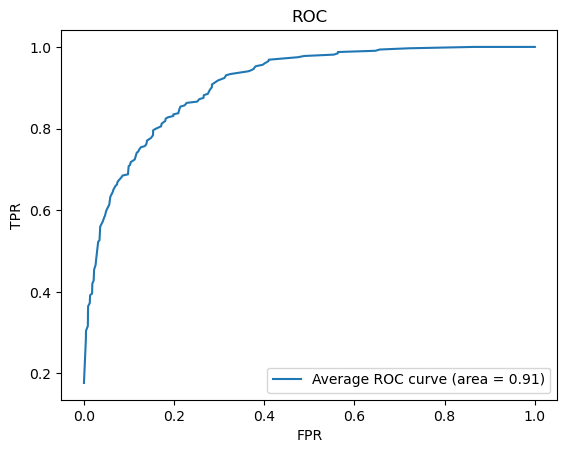

In [1335]:
### YOUR CODE HERE
# Optimal Hyperparameters Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
MAX_ITER=600
# Defining the model with the specified hyperparameters
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=MAX_ITER)

# Defining the parameter grid to search through
param_grid = {
    'C': np.logspace(-4, 4, 10)
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameter
print("Best parameter:", grid_search.best_params_)


# Model Quality Estimation
from sklearn.metrics import f1_score, accuracy_score

# Retrain with the best parameters
best_params = grid_search.best_params_
model = LogisticRegression(**best_params, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=MAX_ITER)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate f1 and accuracy scores
f1 = f1_score(y_test, y_pred, average='weighted') 
print(f"F1 Score: {f1}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

## ROC curve plot
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_test is not binarized and is in a shape that could be used with label_binarize
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred_proba = model.predict_proba(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all FP
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= n_classes

plt.figure()
plt.plot(all_fpr, mean_tpr, label='Average ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
#!pip install --upgrade scipy scikit-plot
#! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

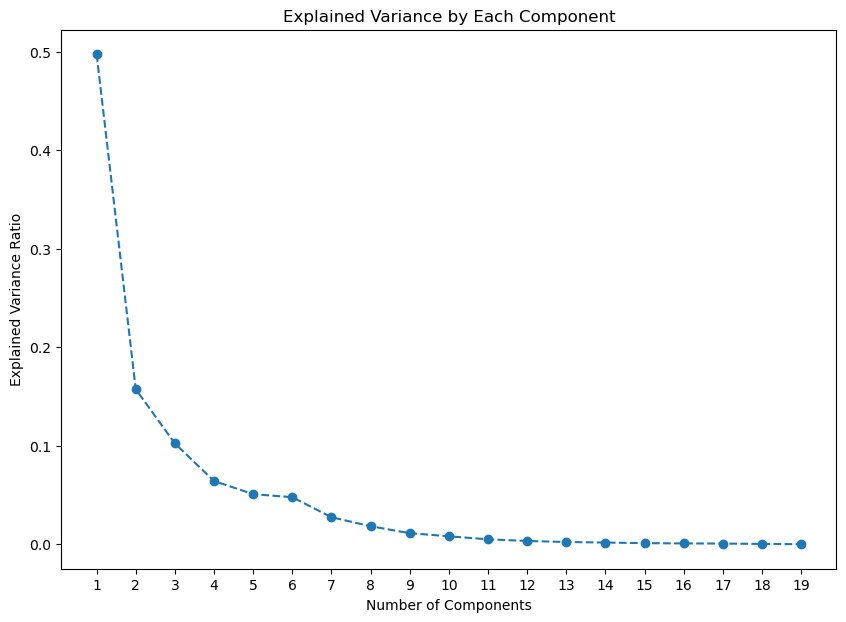

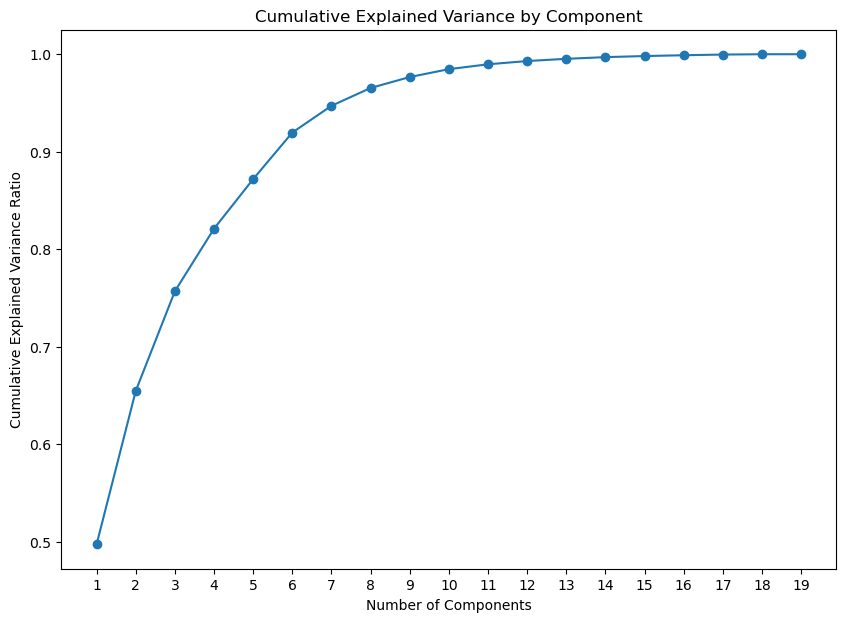

In [1336]:
### YOUR CODE HERE
# Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the Explained Variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Each Component')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()


# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [1338]:
### YOUR CODE HERE
# Выбранное количество компонентов
n_components = 7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best parameters found: {'C': 166.81005372000558}
F1 Score: 0.5544317635226725
Accuracy Score: 0.5723905723905723


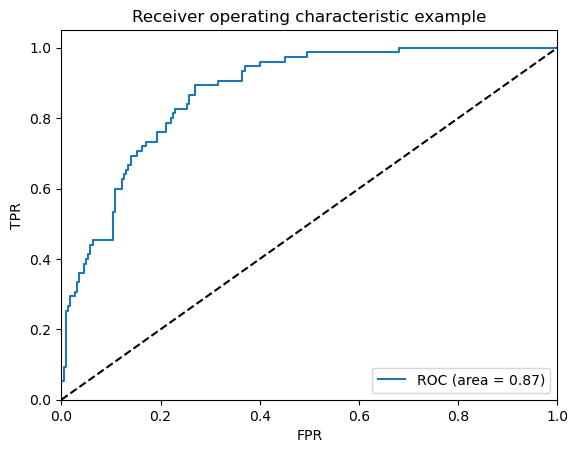

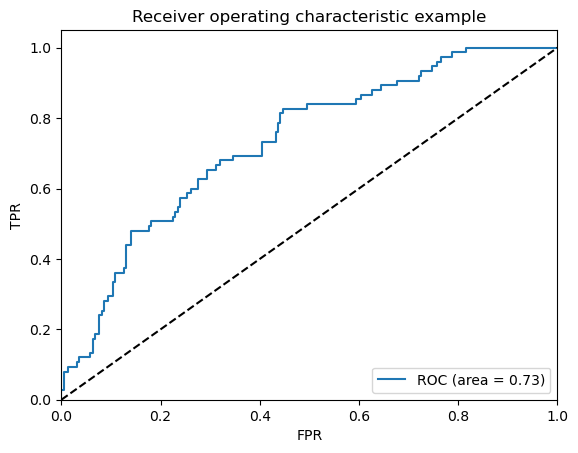

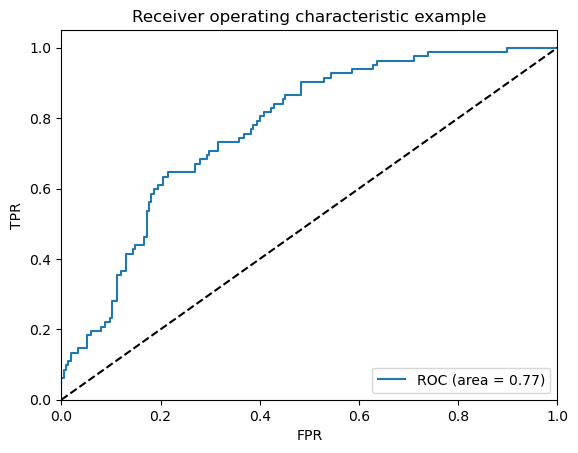

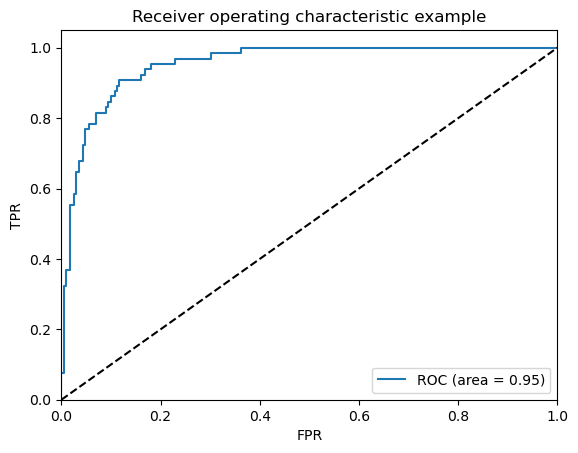

In [1339]:
### YOUR CODE HERE
# Define the Logistic Regression Model and Hyperparameter Space
#from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Define the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Define the hyperparameter space for C
param_grid = {
    'C': np.logspace(-4, 4, 10)
}

# Perform Grid Search with Cross-Validation
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Output the best parameters
print("Best parameters found:", grid_search.best_params_)

# Retrain the Model with the Best Parameters
# Retrain the model with the best parameters
best_model = LogisticRegression(**grid_search.best_params_, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
best_model.fit(X_train_pca, y_train)

# Model Evaluation
# Predictions
y_pred = best_model.predict(X_test_pca)

# Calculate f1 and accuracy scores
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")

# Plot ROC Curve
# Assuming your classes are integer labeled from 0 to n_classes-1
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [1341]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# Define the Decision Tree Model and Parameter Grid
dt_model = DecisionTreeClassifier()

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': range(1, 20)
}

# Perform Grid Search with Cross-Validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_pca, y_train)

# Output the best parameters
print("Best parameters found for Decision Tree:", grid_search_dt.best_params_)

# Retrain the Model with the Best Parameters
best_dt_model = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth'])
best_dt_model.fit(X_train_pca, y_train)

# Model Evaluation
y_pred_dt = best_dt_model.predict(X_test_pca)

# Calculate f1 and accuracy scores
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree F1 Score: {f1_dt}")
print(f"Decision Tree Accuracy Score: {accuracy_dt}")



Best parameters found for Decision Tree: {'max_depth': 14}
Decision Tree F1 Score: 0.6179952853374833
Decision Tree Accuracy Score: 0.6195286195286195


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [1344]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
# Prepare the Optimal Base Models
logistic_regression_optimal = LogisticRegression(multi_class='multinomial', solver='saga', tol=7.8e-3, C=grid_search.best_params_['C'], max_iter=MAX_ITER)
decision_tree_optimal = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth'])

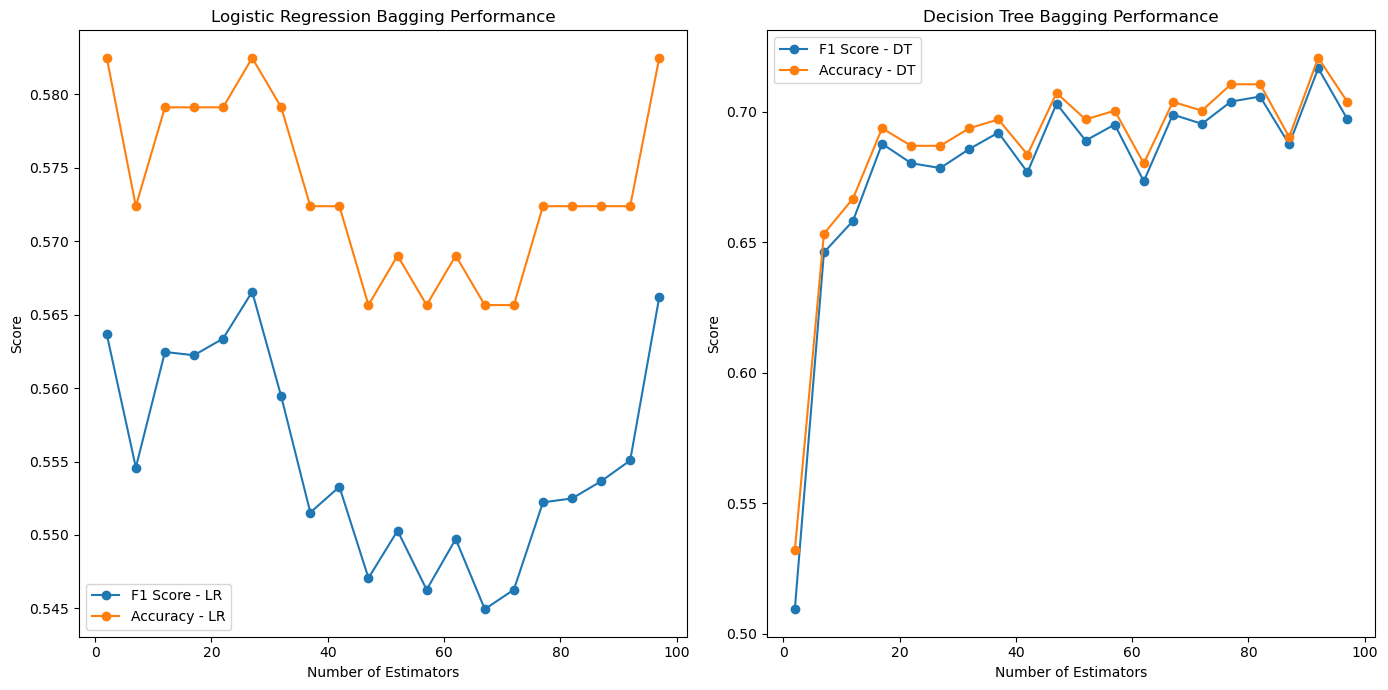

In [1346]:
# Construct the Bagging Ensembles
f1_scores_lr, accuracy_scores_lr = [], []
f1_scores_dt, accuracy_scores_dt = [], []

for n_estimators in range(2, 101, 5):
    # Bagging for logistic regression
    bagging_lr = BaggingClassifier(estimator=logistic_regression_optimal, n_estimators=n_estimators, bootstrap=True, n_jobs=-1)
    bagging_lr.fit(X_train_pca, y_train)
    y_pred_lr = bagging_lr.predict(X_test_pca)
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average='weighted'))
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    
    # Bagging for decision tree
    bagging_dt = BaggingClassifier(estimator=decision_tree_optimal, n_estimators=n_estimators, bootstrap=True, n_jobs=-1)
    bagging_dt.fit(X_train_pca, y_train)
    y_pred_dt = bagging_dt.predict(X_test_pca)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average='weighted'))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_dt))

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range(2, 101, 5), f1_scores_lr, label='F1 Score - LR', marker='o')
plt.plot(range(2, 101, 5), accuracy_scores_lr, label='Accuracy - LR', marker='o')
plt.title('Logistic Regression Bagging Performance')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 101, 5), f1_scores_dt, label='F1 Score - DT', marker='o')
plt.plot(range(2, 101, 5), accuracy_scores_dt, label='Accuracy - DT', marker='o')
plt.title('Decision Tree Bagging Performance')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

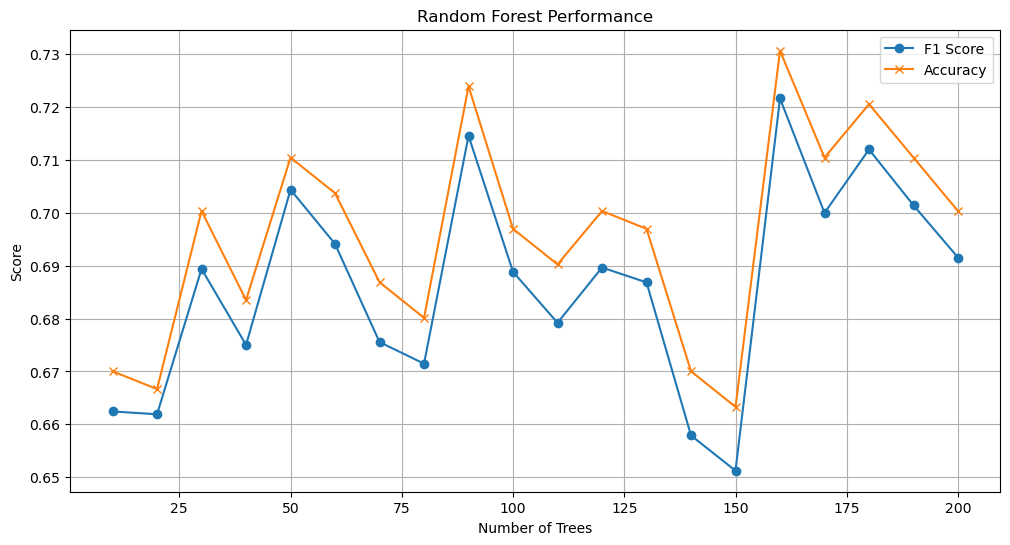

In [1347]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
# Train Random Forest Models with Varying Number of Trees
n_trees_range = range(10, 201, 10)
# Lists to store scores for plotting
f1_scores_rf = []
accuracy_scores_rf = []

for n_trees in n_trees_range:
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
    
    # Fit the model
    rf_model.fit(X_train_pca, y_train)
    
    # Predict on the test set
    y_pred_rf = rf_model.predict(X_test_pca)
    
    # Calculate and store the scores
    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average='weighted'))
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred_rf))

# Plot F1 and Accuracy Scores
plt.figure(figsize=(12, 6))

# Plotting F1 scores
plt.plot(n_trees_range, f1_scores_rf, label='F1 Score', marker='o')
# Plotting accuracy scores
plt.plot(n_trees_range, accuracy_scores_rf, label='Accuracy', marker='x')

plt.title('Random Forest Performance')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()





In [1349]:
param_grid = {
    'n_estimators': np.arange(10, 201, 10)  # For example, from 10 to 200, with a step of 10
}
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted')  # or use 'f1_weighted' for F1 score
grid_search_rf.fit(X_train_pca, y_train)
print("Optimal number of estimators:",  grid_search_rf.best_params_['n_estimators'])

Optimal number of estimators: 180


In [1328]:
param_grid

{'max_depth': range(1, 20)}

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

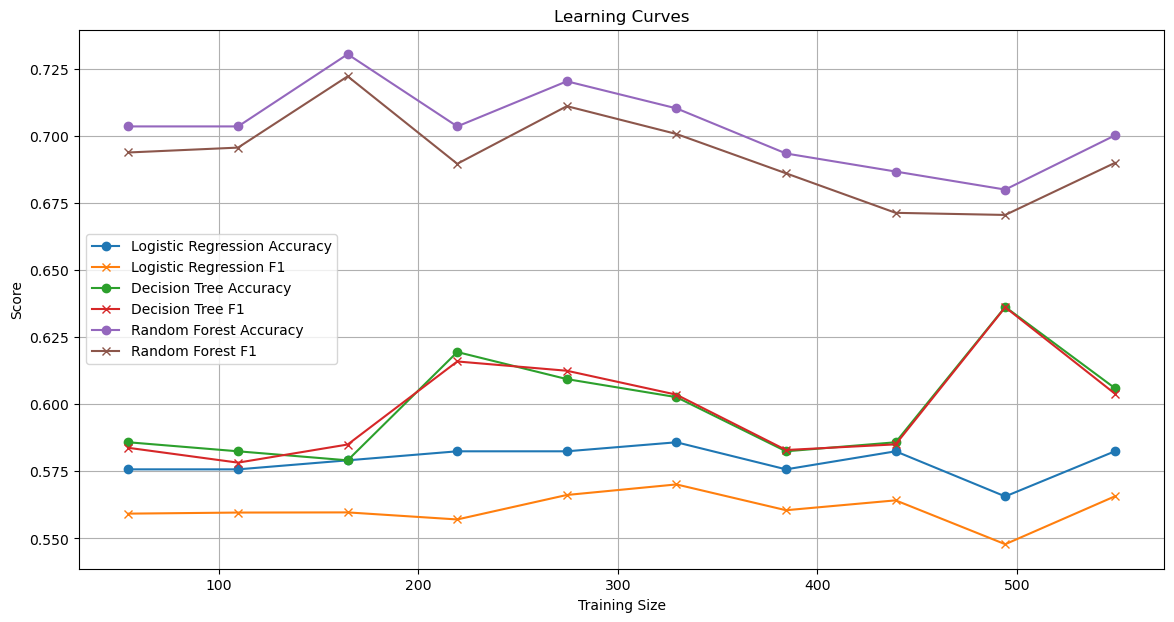

In [1351]:
# YOUR CODE HERE
from sklearn.model_selection import KFold
import numpy as np

# Assuming X_train_pca, y_train, X_test_pca, and y_test are already defined and preprocessed

# Prepare the models with optimal hyperparameters
print(f'grid_search.best_params_: {grid_search.best_params_}')
print(f'grid_search_dt.best_params_: {grid_search_dt.best_params_}')
print(f'grid_search_rf.best_params_: {grid_search_rf.best_params_}')

models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, C=grid_search.best_params_['C'], max_iter=MAX_ITER),
    "Decision Tree": DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth']),
    "Random Forest": RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'], n_jobs=-1)
}

# Initialize scores storage
scores = {model: {'accuracy': [], 'f1': []} for model in models}

# Number of splits
n_splits = 10
kf = KFold(n_splits=n_splits)

for train_index, _ in kf.split(X_train_pca):
    X_train_fold = X_train_pca[train_index]
    y_train_fold = y_train[train_index]
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the test set
        y_pred = model.predict(X_test_pca)
        
        # Calculate scores
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store the scores
        scores[name]['accuracy'].append(accuracy)
        scores[name]['f1'].append(f1)

# Plotting the learning curves
plt.figure(figsize=(14, 7))

for name, score in scores.items():
    plt.plot(np.linspace(1, n_splits, n_splits) * (len(X_train_pca) / n_splits), score['accuracy'], label=f"{name} Accuracy", marker='o')
    plt.plot(np.linspace(1, n_splits, n_splits) * (len(X_train_pca) / n_splits), score['f1'], label=f"{name} F1", marker='x')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
